In [155]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

(769L, 574L, 3L)
(769L, 574L, 3L)


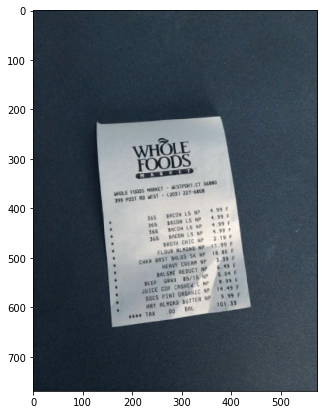

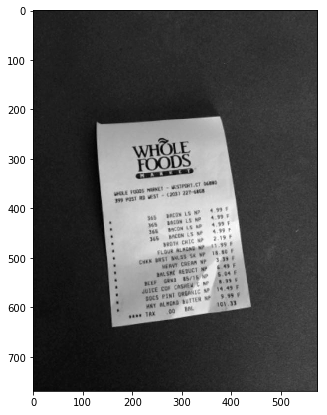

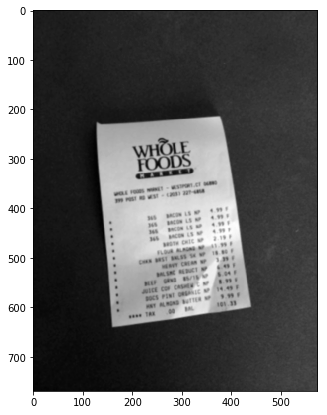

In [174]:
ig=cv2.imread('d:ML--perceptron/Camscannner/rec.JPG')
print ig.shape

ig=cv2.resize(ig,(574,769))
print ig.shape
orig=ig.copy()

ig1=cv2.cvtColor(ig,cv2.COLOR_BGR2GRAY)

plt.figure(1, figsize=(7,7))
plt.imshow(ig)
blurred=cv2.GaussianBlur(ig1,(5,5),0) ##overlapping kernel using for smoothening..

plt.figure(2, figsize=(7,7))
plt.imshow(ig1,cmap='gray')

plt.figure(3, figsize=(7,7))
plt.imshow(blurred,cmap='gray')

plt.show()

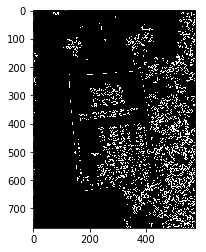

In [175]:
## Edge Detector
##cv2.Canny(blurred,)
edges=cv2.Canny(ig1,0,50)
plt.imshow(edges,cmap='gray')

In [176]:
cntr,heirarchy=cv2.findContours(edges,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

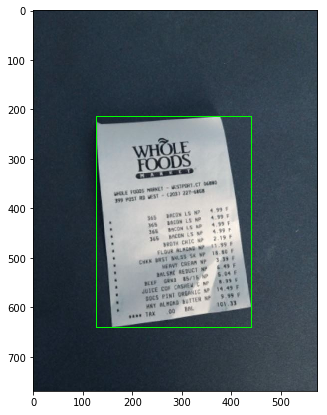

largest contour is:
[[[376 214]]

 [[128 226]]

 [[160 639]]

 [[438 599]]]


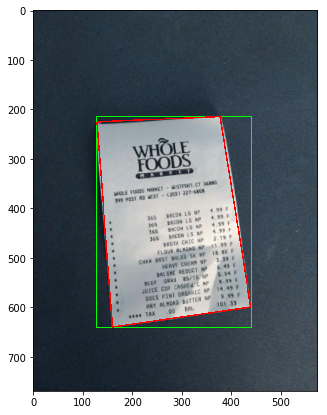

In [177]:
contours=sorted(cntr,key=cv2.contourArea,reverse=True)

x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(ig,(x,y),(x+w,y+h),(0,255,0),2)
plt.figure(4, figsize=(7,7))
plt.imshow(ig, cmap='gray')
plt.show()

for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*p,True)
    if len(approx)==4:
        target=approx
        break
print "largest contour is:"
print target

cv2.drawContours(ig,[target],-1,(255,0,0),2)
plt.figure(5,figsize=(7,7))
plt.imshow(ig,cmap="gray")
plt.show()



In [178]:
approx=rectify(target)
print approx

[[128. 226.]
 [376. 214.]
 [438. 599.]
 [160. 639.]]


In [179]:
print target
target= target.reshape((4,2))
print target.sum(1)
add= target.sum(1)

print target[np.argmin(add)]
print target[np.argmax(add)]

diff = np.diff(target,axis = 1)
print diff
print target[np.argmin(diff)]
print target[np.argmax(diff)]

[[[376 214]]

 [[128 226]]

 [[160 639]]

 [[438 599]]]
[ 590  354  799 1037]
[128 226]
[438 599]
[[-162]
 [  98]
 [ 479]
 [ 161]]
[376 214]
[160 639]


In [180]:
def rectify(h):
    h=h.reshape((4,2))
    hnew=np.zeros((4,2),dtype=np.float32)
    add=h.sum(1)
    hnew[0]=h[np.argmin(add)]
    hnew[2]=h[np.argmax(add)]
    
    diff=np.diff(h,axis=1)
    hnew[1]=h[np.argmin(diff)]  
    hnew[3]=h[np.argmax(diff)]
    return hnew

In [181]:
print target
approx=rectify(target)
print approx

[[376 214]
 [128 226]
 [160 639]
 [438 599]]
[[128. 226.]
 [376. 214.]
 [438. 599.]
 [160. 639.]]


[[ 3.19833634e+00 -2.47812985e-01 -3.53381317e+02]
 [ 1.12119640e-01  2.31713923e+00 -5.38024780e+02]
 [-2.23361165e-04  3.70024570e-04  1.00000000e+00]]


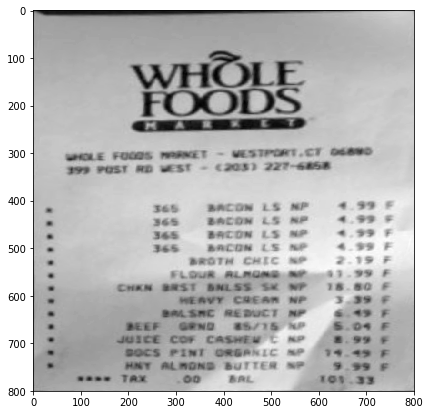

In [184]:
pts2=np.float32([[0,0],[800,0],[800,800],[0,800]])
M=cv2.getPerspectiveTransform(approx,pts2)
print M
dst=cv2.warpPerspective(orig,M,(800,800))

dst=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
plt.figure(6,figsize=(7,7))
plt.imshow(dst,cmap="gray")
plt.show()